In [7]:
import cv2 as cv
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
def read_images_in_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            image = cv.imread(image_path)
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            image = cv.resize(image, (250, 250))
            if image is not None:
                images.append(image)
    return images

folder_path = '../data/images/'
images = read_images_in_folder(folder_path)

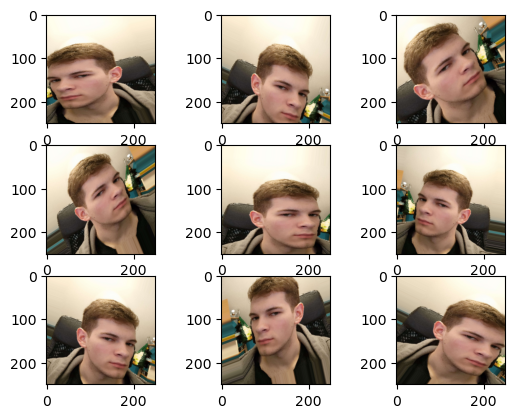

In [40]:
def augment_images(images):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
    augmented_images = []
    for image in images:
        image = np.expand_dims(image, 0)
        i = 0
        for batch in train_datagen.flow(image, batch_size=1):
            augmented_images.append(batch)
            i += 1
            if i >= 50:
                break
    return augmented_images

augmented_images = augment_images(images)
augmented_images = np.array(augmented_images)

fig, ax = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(augmented_images[i*3+j][0])